<a href="https://colab.research.google.com/github/hyeonukim/DataProcessing_ImageHandling/blob/main/How_to_handle_Data%2C_and_Images(8)_Image_Thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Thresholding

**cv2.threshold(image, thresh, max_value, type)**: Applies a fixed-level threshold to each array element.
- image: The Gray Scaled image we're working with
- thresh: threshold value (applies for all pixel)
- max_value: maximum value to use with the thresholding types
- type: thresholding type
  - THRESH_BINARY: If bigger than thresh value, max_value else 0
  - THRESH_BINARY_INV: if bigger than thresh value, 0 else max_value
  - THRESH_TRUNC: if bigger than thresh value, thresh value else don't change
  - THRESH_TOZERO: if bigger than thresh, don't change else 0
  - THRESH_TOZERO_INV: if bigger than  thresh, 0 else don't change

In [2]:
from google.colab import files
uploaded = files.upload()

Saving chanelsun.jpg to chanelsun.jpg


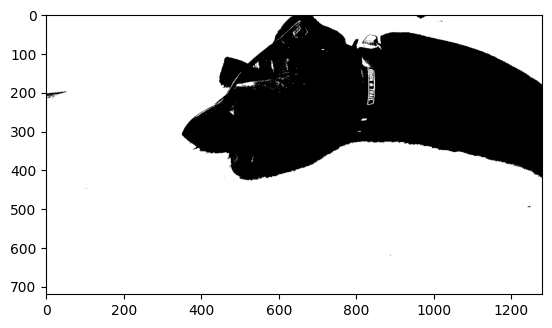

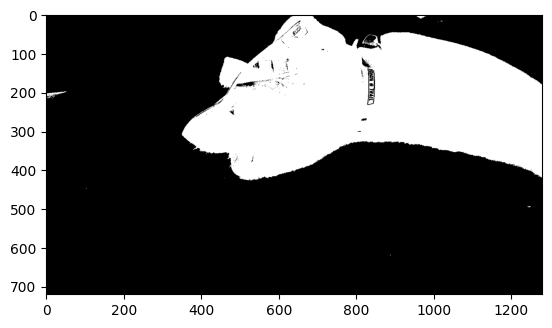

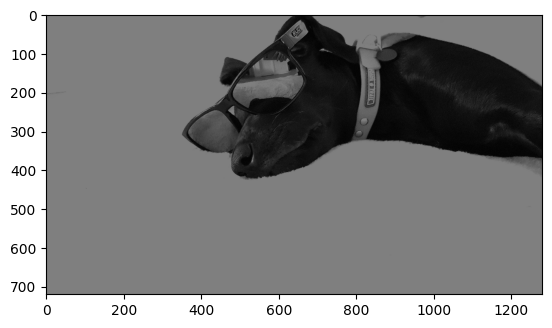

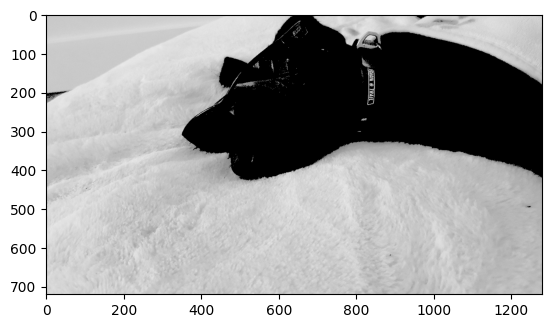

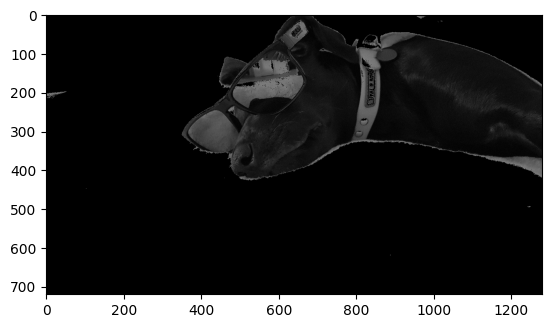

In [4]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('chanelsun.jpg', cv2.IMREAD_GRAYSCALE)

images = []
# all of the thresholding value is 127, with max_value 255.
ret, thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)

images.append(thresh1)
images.append(thresh2)
images.append(thresh3)
images.append(thresh4)
images.append(thresh5)

for i in images:
  plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
  plt.show()


**cv2.adaptiveThreshold(image, max_value, adaptive_method, type, block_size, C)**: adaptive thresholding function
works best if there are many lighting in one image.
- max_value: maximum value to use with the thresholding types
- adaptive_method: methods to calculate with threshold
  - ADAPTIVE_THRESH_MEAN_C: The threshold value $T(x,y)$ is a mean of the $blockSize \times blockSize$ neightborhood of $(x,y)$ minus $C$
  - ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value $T(x,y)$ is a weighted sum (cross-correlation with a Gaussian window) of the $blockSize \times blockSize$ neighborhood of $(x,y)$ minus $C$. The default sigma (standard deviation) is used for the specific blockSize
- type: thresholding type
- block_size: value for applying threshold to block_size
- C: the constant value to decrement from adaptive_method

If using Adaptive Threshold, thresholding doesn't apply towards all pixels


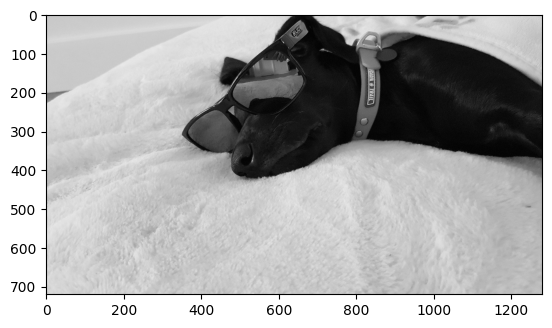

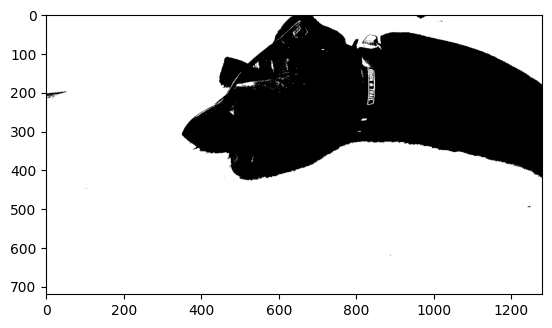

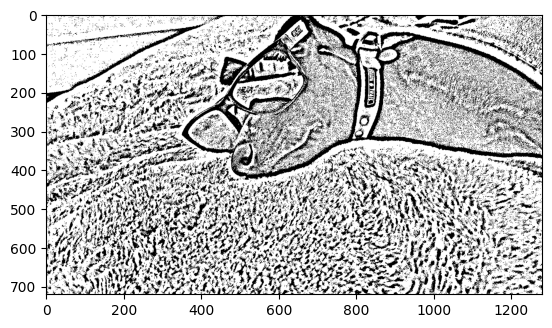

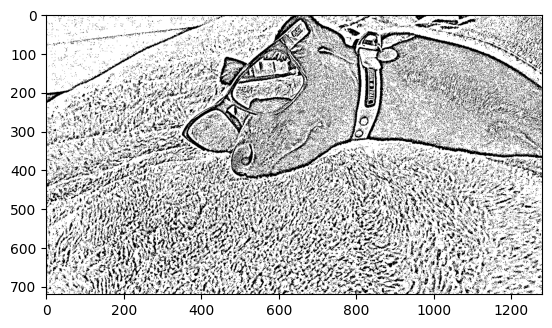

In [12]:
import cv2

image = cv2.imread('chanelsun.jpg', cv2.IMREAD_GRAYSCALE)

# the thresholding value is 127, with max_value 255.
ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
# adaptive thresholding doesn't require a thresholding value, it calcualtes it using each methods
thres2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3)
thres3 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres1, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres2, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres3, cv2.COLOR_GRAY2RGB))
plt.show()